Tenemos que hacer una predicción de los clientes que se van de la operadora, para ello contamos con dos archivos CSV, Uno es el entrenamiento que contiene el 80% de un total de 3333 registros y otro es el archivo de test donde tenemos el 20% restante

Los datos que hemos obtenido para el test se han tomado de muestras aleatorias, nunca en secuencia de el total.



Lo primero que tenemos que hacer es importar las librerías necesarias para afrontar el proyecto.
Pandas es una librería de Python especializada en el manejo y análisis de estructuras de datos.

A continuación, importamos Pandas y podemos subir los archivos a nuestro espacio de trabajo sin tener que subirlos manualmente.





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from google.colab import files
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import cohen_kappa_score, confusion_matrix
from sklearn.model_selection import train_test_split

import seaborn as sns

uploaded = files.upload()


Saving churn-bigml-20.csv to churn-bigml-20.csv
Saving churn-bigml-80.csv to churn-bigml-80.csv


Lo siguiente sería pasar los datos con los que vamos a trabajar a DataFrame.
¿Qué es un DataFrame?
Un DataFrame es una estructura de datos con dos dimensiones en la cual se puede guardar datos de distintos tipos (como caractéres, enteros, valores de punto flotante, factores y más) en columnas.


In [ ]:
Train = pd.read_csv('churn-bigml-80.csv', header=0)
Test = pd.read_csv('churn-bigml-20.csv', header=0)
print(Train, Test)



     State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
2661    SC              79        415                 No              No   
2662    AZ             192        415                 No             Yes   
2663    WV              68        415                 No              No   
2664    RI              28        510                 No              No   
2665    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                   

Exposición de datos

También podemos unir los dos en una concatenación para tener el total de los datos, y hacer un analisis con ellos a continuación



In [ ]:
# set files path
telefonia1 = 'churn-bigml-20.csv'
telefonia2 = 'churn-bigml-80.csv'
print("*************************************")
print("*** Concatenación de archivos CSV ***")
print("*************************************\n")

# merge files
teleoperadoradFTotal = pd.concat(
   map(pd.read_csv, [telefonia1, telefonia2]), ignore_index=True)
print(teleoperadoradFTotal)

*************************************
*** Concatenación de archivos CSV ***
*************************************

     State  Account length  Area code International plan Voice mail plan  \
0       LA             117        408                 No              No   
1       IN              65        415                 No              No   
2       NY             161        415                 No              No   
3       SC             111        415                 No              No   
4       HI              49        510                 No              No   
...    ...             ...        ...                ...             ...   
3328    SC              79        415                 No              No   
3329    AZ             192        415                 No             Yes   
3330    WV              68        415                 No              No   
3331    RI              28        510                 No              No   
3332    TN              74        415            

Podemos ver la descripción de los datos de todas las columnas

In [ ]:
teleoperadoradFTotal.describe()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Tambien podemos ver la forma del dataFrame, numero de rows x columns



In [ ]:
teleoperadoradFTotal.shape

(3333, 20)

Vamos a empezar a trabajar con los datos, asi que vamos a desgranar su forma, para ello tenemos que saber el nombre de las columnas.



In [ ]:
teleoperadoradFTotal.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

Ahora que ya sabemos el nombre de la columna, insertaremos el tipo de dato que alberga.


In [ ]:
teleoperadoradFTotal.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

Comprobamos no tener valores duplicados en la tabla, esto nos facilitará a posteriori en el entrenamiento

In [ ]:
len(teleoperadoradFTotal[teleoperadoradFTotal.duplicated()])

0

Como vamos a trabajar con Churn debemos saber los datos que contiene, sabemos que es un valor booleano, por lo tanto responderá con uno de los valores True o False

In [ ]:
teleoperadoradFTotal["Churn"].unique()

array([False,  True])

Contamos los valores True o False de Churns.




In [ ]:
print(teleoperadoradFTotal.Churn.value_counts())

False    2850
True      483
Name: Churn, dtype: int64


Retorna valores númericos en cada columna, para poder operar con ellos en MatPloblib





In [ ]:
teleoperadoradFTotal.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

Sacamos porcentaje visual y destacamos en rojo los que se van que son el 14.5% y en verde los que se quedan que son el 85.5%

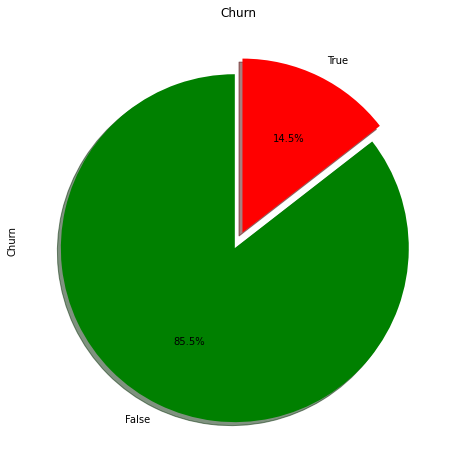

In [ ]:
teleoperadoradFTotal ['Churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8), colors = ['green', 'red'])
plt.title('Churn')
plt.show()

A continuación, vamos a analizar mediante gráficas de columnas y hacer una comparativa entre ellas, también hemos seleccionado los datos más relevantes que nos ha dado BigML, que son llamadas de atención al cliente, plan internacional y plan de buzón de voz.

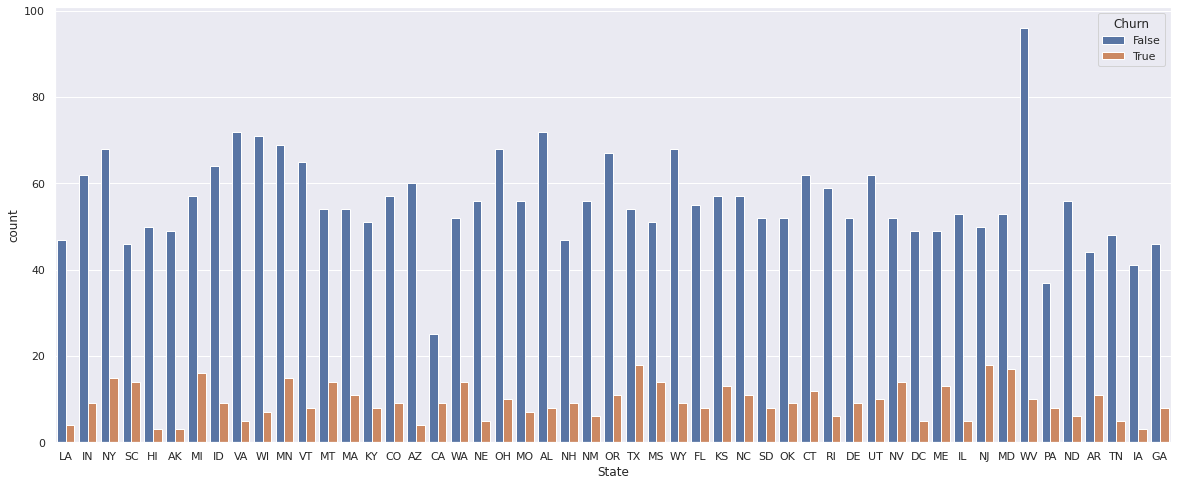

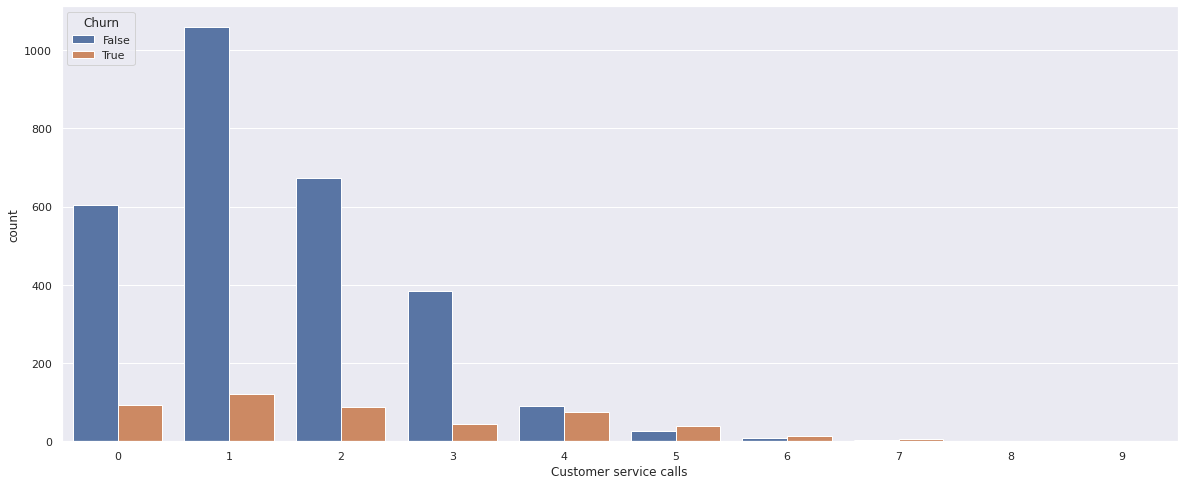

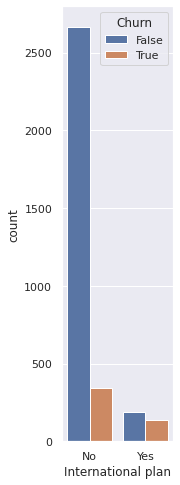

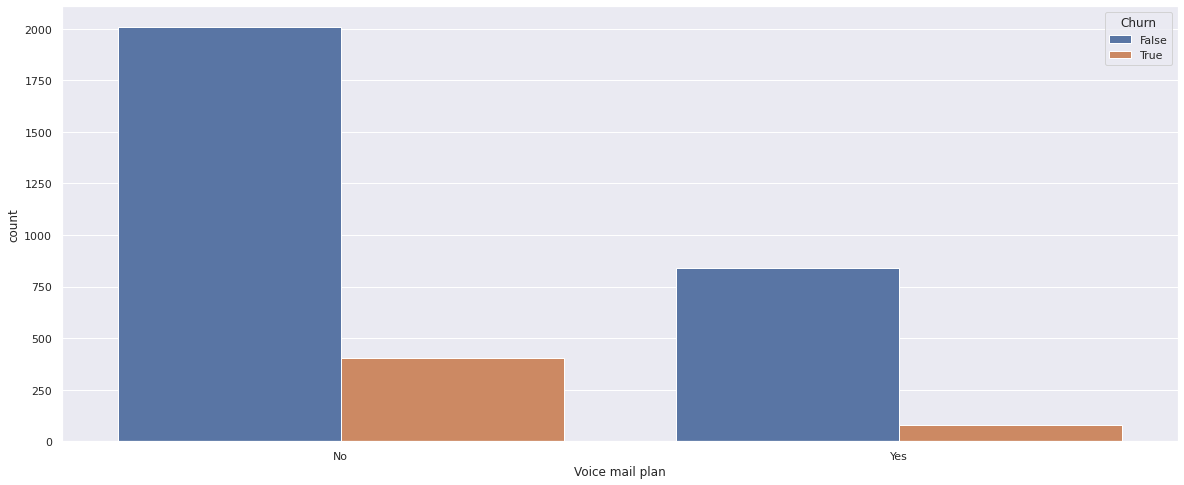

In [ ]:

sns.set(style="darkgrid")
plt.figure(figsize=(20,8))
ax = sns.countplot(x='State', hue="Churn", data=teleoperadoradFTotal)

sns.set(style="darkgrid")
plt.figure(figsize=(20,8))
ax = sns.countplot(x='Customer service calls', hue="Churn", data=teleoperadoradFTotal)

sns.set(style="darkgrid")
plt.figure(figsize=(2,8))
ax = sns.countplot(x='International plan', hue="Churn", data=teleoperadoradFTotal)

sns.set(style="darkgrid")
plt.figure(figsize=(20,8))
ax = sns.countplot(x='Voice mail plan', hue="Churn", data=teleoperadoradFTotal)


plt.show()

Podemos cruzar una tabla y enseñar el total actual de los que se quedan y se van en el plan internacional.

In [ ]:

pd.crosstab(teleoperadoradFTotal["Churn"], teleoperadoradFTotal["International plan"])




International plan,No,Yes
Churn,,
0,2664,186
1,346,137


Se puede agrupar los datos y hacer una media con la tasa de abandono y el total de minutos diarios. 

In [ ]:

teleoperadoradFTotal.groupby("Churn")["Total day minutes"].mean()



NameError: ignored

También podemos sacar en porcentajes, probamos la tasa de abandono con plan internacional y plan de buzón de voz.

In [ ]:

International_plan_data = pd.crosstab(teleoperadoradFTotal['International plan'],teleoperadoradFTotal['Churn'])
International_plan_data['Porcentaje de dejar la compañia'] = International_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]), axis = 1)
print(International_plan_data)

Churn               False  True  Porcentaje de dejar la compañia
International plan                                              
No                   2664   346                        11.495017
Yes                   186   137                        42.414861


In [ ]:
International_plan_data = pd.crosstab(teleoperadoradFTotal['Voice mail plan'],teleoperadoradFTotal['Churn'])
International_plan_data['Porcentaje de dejar la compañia'] = International_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]), axis = 1)
print(International_plan_data)

Churn            False  True  Porcentaje de dejar la compañia
Voice mail plan                                              
No                2008   403                        16.715056
Yes                842    80                         8.676790


Comparamos en cifras también para tener una mejor visión del conjunto por llamadas al servicio de atención al cliente.



In [ ]:
#Calculamos las llamadas de atención al cliente con la tasa de abandono

Customer_service_calls_data = pd.crosstab(teleoperadoradFTotal['Customer service calls'],teleoperadoradFTotal['Churn'])
Customer_service_calls_data['Porcentaje de dejar la compañia'] = Customer_service_calls_data.apply(lambda x : x[1]*100/(x[0]+x[1]), axis = 1)
print(Customer_service_calls_data)

Churn                   False  True  Porcentaje de dejar la compañia
Customer service calls                                              
0                         605    92                        13.199426
1                        1059   122                        10.330229
2                         672    87                        11.462451
3                         385    44                        10.256410
4                          90    76                        45.783133
5                          26    40                        60.606061
6                           8    14                        63.636364
7                           4     5                        55.555556
8                           1     1                        50.000000
9                           0     2                       100.000000


Una matriz de correlación es una tabla que indica los coeficientes de conexión entre los factores. Cada celda de la tabla muestra la conexión entre los dos factores. Nos podemos fijar en la tabla en la columna Churn que será a más relevante para nosotros.

Text(0.5, 1.0, 'Mapa de calor de correlación')

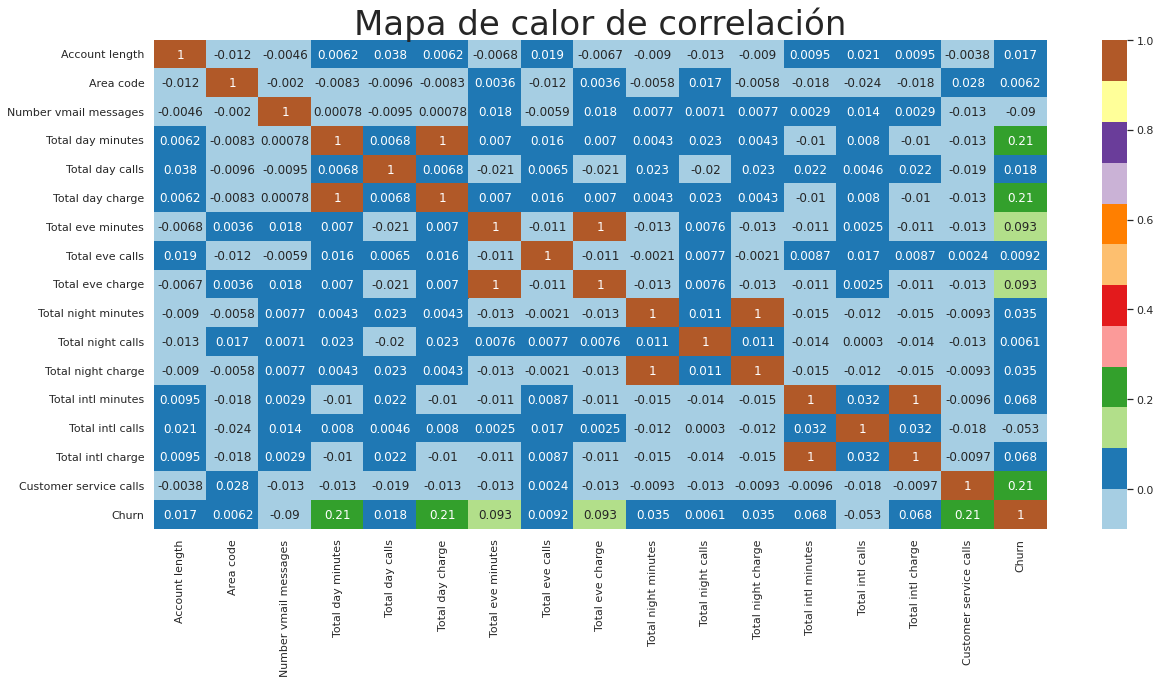

In [ ]:

teleoperadoradFTotal['Churn'] = teleoperadoradFTotal['Churn'].replace({bool(True):1,bool(False):0})
plt.figure(figsize=(20,9))
sns.heatmap(teleoperadoradFTotal.corr(), cmap="Paired",annot=True)
plt.title("Mapa de calor de correlación", fontsize=34)

Vamos a ver la información que nos muestra cada dataFrame Train y Test por separado.


In [ ]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

Unique() 
Devuelve valores únicos basados ​​en una tabla hash.
Los únicos se devuelven en orden de aparición. Esto NO se ordena.
Significativamente más rápido que numpy.unique para secuencias lo suficientemente largas.

In [ ]:
teleoperadoradFTotal['State'].unique()

array(['LA', 'IN', 'NY', 'SC', 'HI', 'AK', 'MI', 'ID', 'VA', 'WI', 'MN',
       'VT', 'MT', 'MA', 'KY', 'CO', 'AZ', 'CA', 'WA', 'NE', 'OH', 'MO',
       'AL', 'NH', 'NM', 'OR', 'TX', 'MS', 'WY', 'FL', 'KS', 'NC', 'SD',
       'OK', 'CT', 'RI', 'DE', 'UT', 'NV', 'DC', 'ME', 'IL', 'NJ', 'MD',
       'WV', 'PA', 'ND', 'AR', 'TN', 'IA', 'GA'], dtype=object)

In [ ]:
teleoperadoradFTotal['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
OR     78
OH     78
WI     78
VA     77
WY     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
KS     70
MD     70
MT     68
NJ     68
NC     68
NV     66
WA     66
CO     66
MA     65
MS     65
RI     65
AZ     64
FL     63
MO     63
NM     62
ND     62
ME     62
OK     61
NE     61
DE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

In [ ]:
teleoperadoradFTotal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Limpieza y adecuación de datos.

In [ ]:
data_clean = teleoperadoradFTotal.drop(['State','Total day charge','Total intl charge','Total night charge','Total eve charge'], axis=1)

In [ ]:
teleoperadoradFTotal.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
data_clean.columns

Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total eve minutes', 'Total eve calls', 'Total night minutes',
       'Total night calls', 'Total intl minutes', 'Total intl calls',
       'Customer service calls', 'Churn'],
      dtype='object')

In [ ]:
data_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   object 
 3   Voice mail plan         3333 non-null   object 
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total eve minutes       3333 non-null   float64
 8   Total eve calls         3333 non-null   int64  
 9   Total night minutes     3333 non-null   float64
 10  Total night calls       3333 non-null   int64  
 11  Total intl minutes      3333 non-null   float64
 12  Total intl calls        3333 non-null   int64  
 13  Customer service calls  3333 non-null   int64  
 14  Churn                   3333 non-null   

In [ ]:
#dummy categorical data
data_clean['International plan']=data_clean['International plan'].replace(['No','Yes'],[0,1])
data_clean['Voice mail plan']=data_clean['Voice mail plan'].replace(['No','Yes'],[0,1])
data_clean['Churn']=data_clean['Churn'].replace([False,True],[0,1])

In [ ]:
data_clean

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,117,408,0,0,0,184.5,97,351.6,80,215.8,90,8.7,4,1,0
1,65,415,0,0,0,129.1,137,228.5,83,208.8,111,12.7,6,4,1
2,161,415,0,0,0,332.9,67,317.8,97,160.6,128,5.4,9,4,1
3,111,415,0,0,0,110.4,103,137.3,102,189.6,105,7.7,6,2,0
4,49,510,0,0,0,119.3,117,215.1,109,178.7,90,11.1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,79,415,0,0,0,134.7,98,189.7,68,221.4,128,11.8,5,2,0
3329,192,415,0,1,36,156.2,77,215.5,126,279.1,83,9.9,6,2,0
3330,68,415,0,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,0
3331,28,510,0,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,0


In [ ]:
#prepare data 
target = data_clean.iloc[: , -1].values
feature = data_clean.iloc[: , : -1].values

In [ ]:
target.reshape(-1,1)

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

Para el test hará una segmentación del 20% de los datos totales

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.20,random_state=101)

**Arbol** de decicisión


In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, predictions)
confMatrix = confusion_matrix(y_test, predictions) 
      
        
print(); print('Evaluation of the trained model: ')
print(); print('Accuracy : ', acc)
print(); print('Confusion Matrix :\n', confMatrix)



Evaluation of the trained model: 

Accuracy :  0.9055472263868066

Confusion Matrix :
 [[536  36]
 [ 27  68]]


Bosque aleatorio

In [ ]:
model = RandomForestClassifier(n_estimators=200, criterion='gini', 
                                max_depth=8, min_samples_split=2, 
                                min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                max_features=None, max_leaf_nodes=None, 
                                min_impurity_decrease=0.0, 
                                bootstrap=True, oob_score=False, 
                                warm_start=False, class_weight=None)

In [ ]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

In [ ]:
acc                 = accuracy_score(y_test, predictions)
confMatrix          = confusion_matrix(y_test, predictions) 

print(); print('Evaluation of the trained model: ')
print(); print('Accuracy : ', acc)
print(); print('Confusion Matrix :\n', confMatrix)



Evaluation of the trained model: 

Accuracy :  0.9445277361319341

Confusion Matrix :
 [[567   5]
 [ 32  63]]
